# Cincinnati Police Call Records

The story covers the rate of calls of various areas in Cincinnati.

## Making imports
We make imports for matplotlib which would help in changing size of plots and defining colrs for the plot.

In [10]:
# -*- coding: utf-8 -*-
"""
Created on Fri Mar 09 17:36:24 2018

@author: akshitac8
"""
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd



## Making Function for Plotting
The following steps are followed in order to make a histogram.
- We make a subplot.
- Set *x* and *y* labels.
- Give a suitable title.
- As the names of certain cities is long, we want them to be displayed in our plot, hence give a tight layout.
- We make a provision for trimming i.e. to display only top *n* values.

In [18]:
def myhis(data, x_label, y_label, title, trim,save=False):
    _, ax = plt.subplots()
    if trim:
        data.value_counts()[:trim].plot(ax=ax, kind='bar')
    else:
        data.value_counts().plot(ax=ax, kind='bar')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    fig=ax.get_figure()
    fig.tight_layout()
    if save:
        fig.savefig(title+'.png')
    else:
        plt.show()


We now define the size of a plot.

In [12]:
# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (14, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

## Let the story begin.
Till now, we have seen what has to be done as far as the code is concerned. Now, we are ready to tell the story. We load our data and get an insight what our data looks like. We load our `.csv` file and see the the head.

In [13]:
daily_data=pd.read_csv("Police_Data.csv")

In [14]:
daily_data.head()

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGENCY,CREATE_TIME_INCIDENT,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_ID,INCIDENT_TYPE_DESC,NEIGHBORHOOD,PRIORITY,PRIORITY_COLOR,ARRIVAL_TIME_PRIMARY_UNIT,CLOSED_TIME_INCIDENT,DISPATCH_TIME_PRIMARY_UNIT,BEAT,COMMUNITY_COUNCIL_NEIGHBORHOOD
0,6XX DUTCH COLONY DR,39.189810,-84.512456,CP,03/25/2016 06:18:05 PM,INVESTIGATED,LCP160325001203,INV,INVESTIGATE (SPECIFY,WINTON HILLS,7.0,NaN,03/25/2016 06:18:06 PM,03/25/2016 06:21:01 PM,03/25/2016 06:18:06 PM,P536,WINTON HILLS
1,43XX KELLOGG AV,39.100230,-84.432431,CP,06/06/2016 02:34:20 AM,INVESTIGATED,LCP160606000135,FIGHT,FIGHT IN PROGRESS,LINWOOD,2.0,NaN,06/06/2016 02:35:13 AM,06/06/2016 03:02:29 AM,06/06/2016 02:34:26 AM,P244,EAST END
2,29XX URWILER AV,39.149932,-84.597943,CP,08/17/2016 07:56:16 AM,INV - INVESTIGATED,LCP160817000303,INV,NaN,WESTWOOD,NaN,NaN,08/17/2016 07:56:16 AM,08/17/2016 08:12:07 AM,08/17/2016 07:56:16 AM,P332,WESTWOOD
3,DANA AV / GRIGG AV,39.144182,-84.455172,CPD,03/08/2017 06:55:26 PM,AST: ASSIST,CPD170308001506,HAZARD,NaN,EVANSTON,5.0,NaN,03/08/2017 06:55:26 PM,03/08/2017 07:01:36 PM,03/08/2017 06:55:26 PM,P222,HYDE PARK
4,54XX STEWART AV,39.166049,-84.397192,CP,05/11/2015 07:49:20 PM,ADV - ADVISED,LCP150511001358,ADV,NaN,MADISONVILLE,NaN,NaN,NaN,05/11/2015 07:50:50 PM,NaN,P235,MADISONVILLE


In [15]:
daily_data.shape

(2021003, 17)

There are 17 columns in our table. It seems we don't need some columns for our story so lets delete those.

In [16]:
drop_list = ['COMMUNITY_COUNCIL_NEIGHBORHOOD', 'DISPATCH_TIME_PRIMARY_UNIT', 'CLOSED_TIME_INCIDENT', 'ARRIVAL_TIME_PRIMARY_UNIT', 'PRIORITY_COLOR', 'EVENT_NUMBER', 'INCIDENT_TYPE_DESC', 'LONGITUDE_X', 'LATITUDE_X', 'ADDRESS_X']
daily_data.drop(drop_list, inplace = True, axis = 1)

## Story Insights
We shall be telling our story with the help of charts and graphs. Lets plot a simple plot to show Area-Wise Calls for each area in Cincinati.

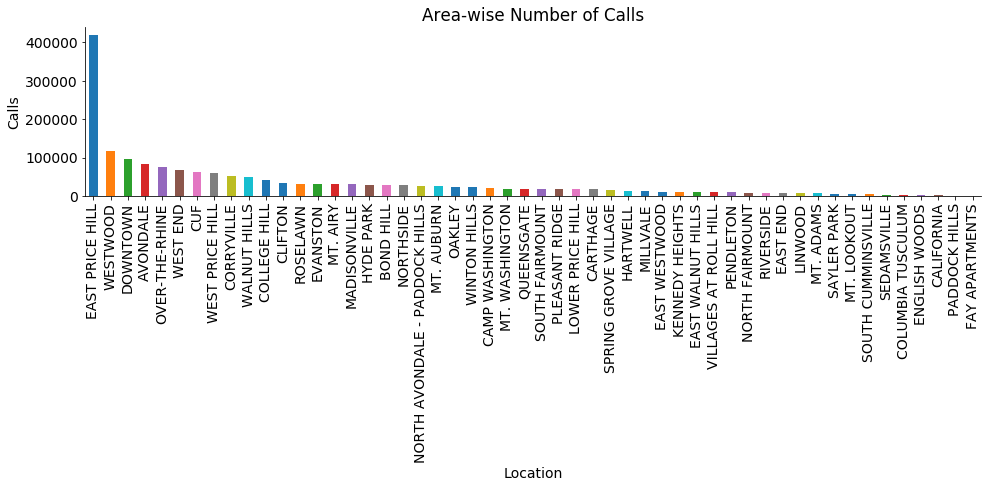

In [20]:
myhis(data = daily_data['NEIGHBORHOOD']
           , x_label = 'Location'
           , y_label = 'Calls'
           , title = 'Area-wise Number of Calls'
           , trim = False)

**East Price Hill** seems to have a fairly high number of calls. Lets see what exactly is happening here. Forst, lets see the top five areas using the `trim` parameter.

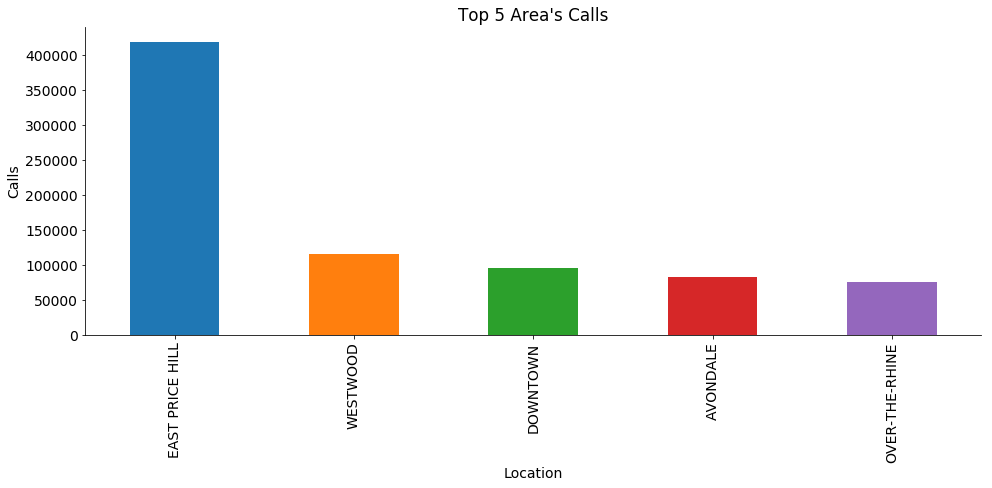

In [21]:
myhis(data = daily_data['NEIGHBORHOOD']
           , x_label = 'Location'
           , y_label = 'Calls'
           , title = 'Top 5 Area\'s Calls'
           , trim = 5)

## What exactly is happening
There seems to be a high difference between **East Price Hill** and other areas. *What can be the reason for such a difference?* Lets check what were the main reasons for calls in the top 2 areas. For this, have a look at the columns that we have in the table above.

In [22]:
list(daily_data)

['AGENCY',
 'CREATE_TIME_INCIDENT',
 'DISPOSITION_TEXT',
 'INCIDENT_TYPE_ID',
 'NEIGHBORHOOD',
 'PRIORITY',
 'BEAT']

We have `INCIDENT_TYPE_ID` which can tell us what kinds of incidents took place in the area.

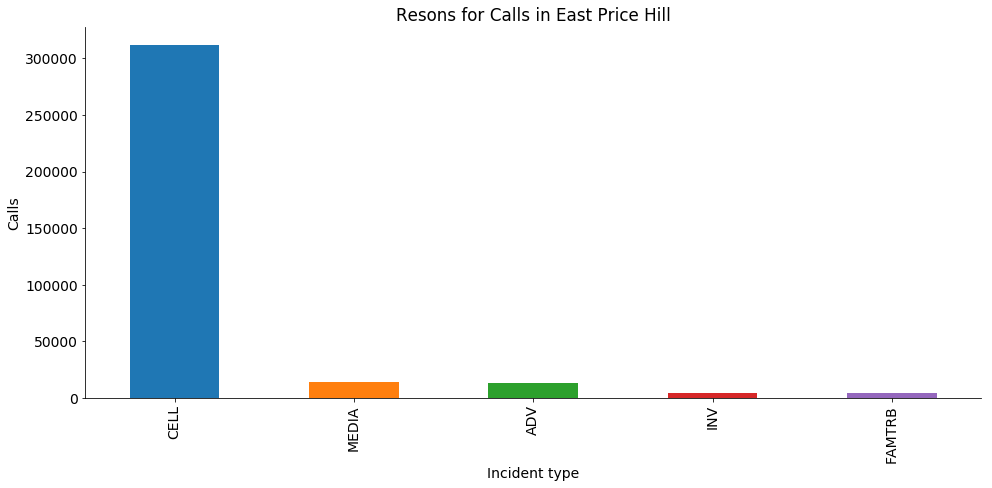

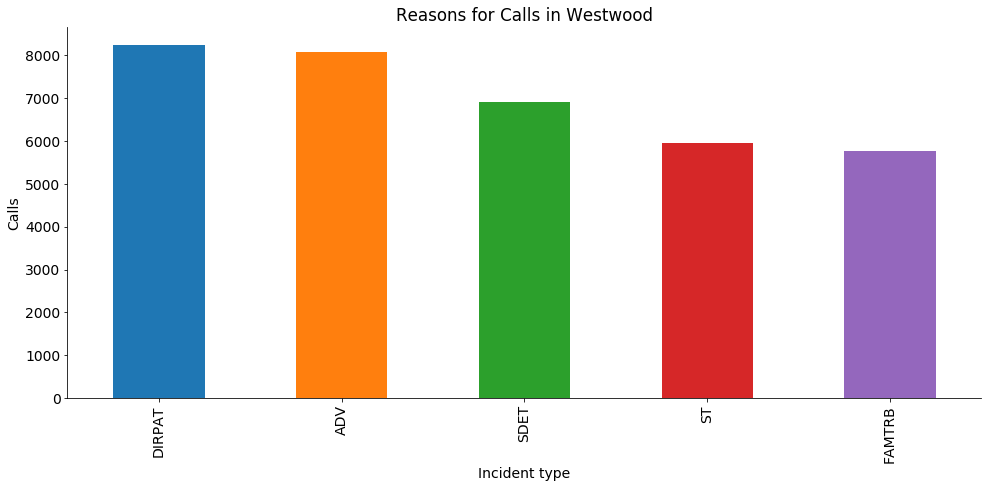

In [23]:
myhis(data = daily_data['INCIDENT_TYPE_ID'][daily_data['NEIGHBORHOOD']=='EAST PRICE HILL']
           , x_label = 'Incident type'
           , y_label = 'Calls'
           , title = 'Resons for Calls in East Price Hill'
           , trim = 5)

myhis(data = daily_data['INCIDENT_TYPE_ID'][daily_data['NEIGHBORHOOD']=='WESTWOOD']
           , x_label = 'Incident type'
           , y_label = 'Calls'
           , title = 'Reasons for Calls in Westwood'
           , trim = 5)


As we can see the type `CELL` has a tremendous rise of calls in **East Price Hill**

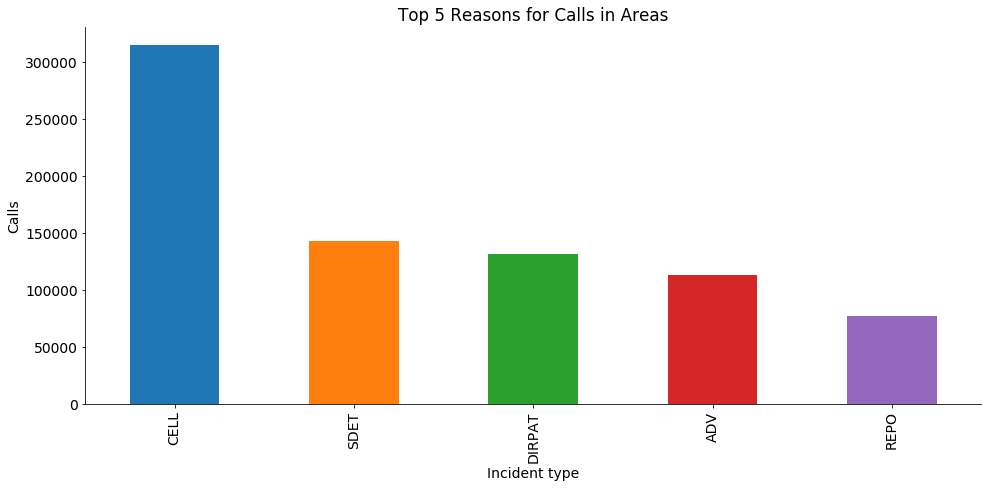

In [25]:
myhis(data = daily_data['INCIDENT_TYPE_ID']
           , x_label = 'Incident type'
           , y_label = 'Calls'
           , title = 'Top 5 Reasons for Calls in Areas'
           , trim = 5)

We can see that the type `CELL` has almost all the calls from **East Price Hill**. Lets do a basic calculation so that we can jump to a conclusion.

In [61]:
#Total Calls
total_calls = len(daily_data)
#Calls in which Incident type is Cell
cell_overall = daily_data['INCIDENT_TYPE_ID'].value_counts()['CELL']
#Calls in East Price Hill in which Incident type is Cell
cell_eph = daily_data['INCIDENT_TYPE_ID'][daily_data['NEIGHBORHOOD']=='EAST PRICE HILL'].value_counts()['CELL']
print "There were a total of {} calls out of which {} were of type CELL. In East Price Hill alone, there were a \
total of {} calls for type CELL which means only {} calls for CELL came from other areas".\
format(total_calls, cell_overall, cell_eph, abs(cell_overall - cell_eph))

There were a total of 2021003 calls out of which 315048 were of type CELL. In East Price Hill alone, there were a total of 312158 calls for type CELL which means only 2890 calls for CELL came from other areas


This brings us to the end of our story. hope you would have enjoyed it. Fell free to comment if you dont undertand anything.